In [1]:
# Importing important libraties
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore un-essential warnings
import warnings
warnings.filterwarnings("ignore")

# Formating styles
pd.options.mode.chained_assignment = None
sns.set_style("darkgrid")
plt.style.use('ggplot')

# For clear plots
%config InlineBackend.figure_format = 'retina'

## Loading Data

In [2]:
df = pd.read_csv('priv_pay_data_with_hospital.csv')

In [3]:
df.head()

,Unnamed: 0,msa,year,site,group,priv_count,priv_pay_mean,priv_pay_median,priv_pay_iqr,mcare_los,...,CBSA_NAME,State,FIPS.State.Code,lon,lat,Hospitals,PctTeaching,PctLargeHospital,Urban,PctPrivate
0,1,10420,2018,Inpatient,breast reconstruction,8,19937.08375,16147.330,5692.86,2.000000,...,"Akron, OH",Ohio,39,-81.519005,41.081445,11.0,0.636364,0.272727,Urban,0.636364
1,2,10580,2018,Inpatient,breast reconstruction,4,14837.26000,10420.675,4474.06,2.888889,...,"Albany-Schenectady-Troy, NY",New York,36,-73.653621,42.763648,17.0,0.235294,0.058824,Urban,0.823529
2,3,10900,2018,Inpatient,breast reconstruction,1,11658.00000,11658.000,0.00,4.222222,...,"Allentown-Bethlehem-Easton, PA-NJ",New Jersey,34,-75.504376,40.583364,17.0,0.529412,0.176471,Urban,0.647059
3,4,11020,2018,Inpatient,breast reconstruction,1,24543.00000,24543.000,0.00,NaN,...,"Altoona, PA",Pennsylvania,42,-78.394736,40.518681,4.0,0.250000,0.000000,Urban,0.750000
4,5,11244,2018,Inpatient,breast reconstruction,9,25467.99000,27320.610,17249.00,2.916667,...,"Anaheim-Santa Ana-Irvine, CA",California,6,-117.888522,33.750247,56.0,0.125000,0.035714,Urban,0.803571


In [4]:
df = df.rename(columns={"FIPS State Code": "FIPS_State_Code"})

## Understanding the data

In [5]:
df.shape

(46247, 23)

In [6]:
df.dtypes

Unnamed: 0            int64
msa                   int64
year                  int64
site                 object
group                object
priv_count            int64
priv_pay_mean       float64
priv_pay_median     float64
priv_pay_iqr        float64
mcare_los           float64
mcare_pay_mean      float64
mcare_pay_median    float64
mcare_pay_sd        float64
CBSA_NAME            object
State                object
FIPS.State.Code       int64
lon                 float64
lat                 float64
Hospitals           float64
PctTeaching         float64
PctLargeHospital    float64
Urban                object
PctPrivate          float64
dtype: object

In [7]:
# Checking unique values of each object type columns

for col in ['site', 'group', 'CBSA_NAME', 'State']:
    print(f'''
    Column: {col}
    Type: {df[col].dtypes}
    
    Unique Values:
    {df[col].unique()}
    
    ---
    ''')


    Column: site
    Type: object
    
    Unique Values:
    ['Inpatient' 'Outpatient' 'ASC']
    
    ---
    

    Column: group
    Type: object
    
    Unique Values:
    ['breast reconstruction' 'mastectomy' 'navigation' 'ant_cerv_fusion'
 'ant_tls_fusion' 'post_cerv_fusion' 'post_tls_fusion' 'rtc_slap_bank'
 'partial shoulder arthroplasty' 'tsa' 'clavicle fixation'
 'proximal humerus' 'radius/ulna internal fixation' 'tha' 'revision_tha'
 'hip_fracture_fixation' 'tka' 'revision_tka' 'femoral shaft fixation'
 'prox_tibia_fixation' 'ankle_fix' 'bunionectomy' 'pnn' 'fess'
 'septoplasty' 'bsp' 'thoracic' 'lung ablation' 'laac' 'bariatric'
 'colorect' 'lap appendectomy' 'hepat' 'liver ablation' 'hernia'
 'kidney ablation' 'hysterect' 'intracranial_thromb' 'cardiac ablation'
 'cardiac ablation_additional_discrete' 'cardiac ablation_linear_focal'
 'cardiac_ablaton_ice' 'cardiac_ablaton_anesthesia' 'tpa'
 'orthovisc_monovisc' 'robotic_assisted_surgery' 'pka' 'prostatectomy']
    
    -

In [8]:
df.columns

Index(['Unnamed: 0', 'msa', 'year', 'site', 'group', 'priv_count',
       'priv_pay_mean', 'priv_pay_median', 'priv_pay_iqr', 'mcare_los',
       'mcare_pay_mean', 'mcare_pay_median', 'mcare_pay_sd', 'CBSA_NAME',
       'State', 'FIPS.State.Code', 'lon', 'lat', 'Hospitals', 'PctTeaching',
       'PctLargeHospital', 'Urban', 'PctPrivate'],
      dtype='object')

In [9]:
num_features = ['priv_count', 'priv_pay_mean', 'priv_pay_median', 'priv_pay_iqr', 'mcare_pay_mean', 
                'mcare_pay_median', 'mcare_pay_sd', 'lon', 'lat', 'mcare_los', 'Hospitals', 'PctTeaching',
                'PctLargeHospital', 'PctPrivate']

In [10]:
df.describe()

,Unnamed: 0,msa,year,priv_count,priv_pay_mean,priv_pay_median,priv_pay_iqr,mcare_los,mcare_pay_mean,mcare_pay_median,mcare_pay_sd,FIPS.State.Code,lon,lat,Hospitals,PctTeaching,PctLargeHospital,PctPrivate
count,46247.000000,46247.000000,46247.000000,46247.000000,46247.000000,46247.000000,4.624700e+04,37308.000000,39454.000000,39454.000000,37783.000000,46247.000000,46107.000000,46107.000000,46050.000000,46050.000000,46050.000000,46050.000000
mean,23124.000000,30410.018942,2018.977469,20.009860,27775.348690,25641.228962,9.942384e+03,1.772610,10835.835973,10271.584709,4785.799586,27.662443,-91.539567,37.598791,17.896200,0.284763,0.082854,0.618388
std,13350.503286,11588.201355,0.817289,64.977492,30528.723402,28691.994943,1.886324e+04,2.563155,8397.420466,7714.373425,6430.179373,16.758886,15.357967,5.337170,27.112901,0.222475,0.098265,0.242870
min,1.000000,10180.000000,2018.000000,1.000000,0.000000,0.000000,-3.640000e-12,0.000000,0.000000,0.000000,0.000000,1.000000,-157.858333,18.080708,1.000000,0.000000,0.000000,0.000000
25%,11562.500000,19780.000000,2018.000000,2.000000,11154.558845,10031.220000,0.000000e+00,0.000000,4334.675072,4223.350000,1118.393249,12.000000,-97.516428,33.951935,4.000000,0.111111,0.000000,0.500000
50%,23124.000000,31084.000000,2019.000000,4.000000,20408.000000,19112.540000,4.871510e+03,0.000000,8967.364375,9007.910000,2500.185000,27.000000,-86.580447,38.358159,8.000000,0.250000,0.062500,0.636364
75%,34685.500000,40580.000000,2020.000000,13.000000,34200.217500,31930.130000,1.221146e+04,3.375000,15179.936692,14171.877500,6178.695784,42.000000,-80.413939,41.563890,21.000000,0.428571,0.137931,0.777778
max,46247.000000,49740.000000,2020.000000,2715.000000,991349.210000,991349.210000,1.175990e+06,50.000000,106911.700000,106911.700000,200165.517300,72.000000,-66.035249,64.837778,204.000000,1.000000,0.750000,1.000000


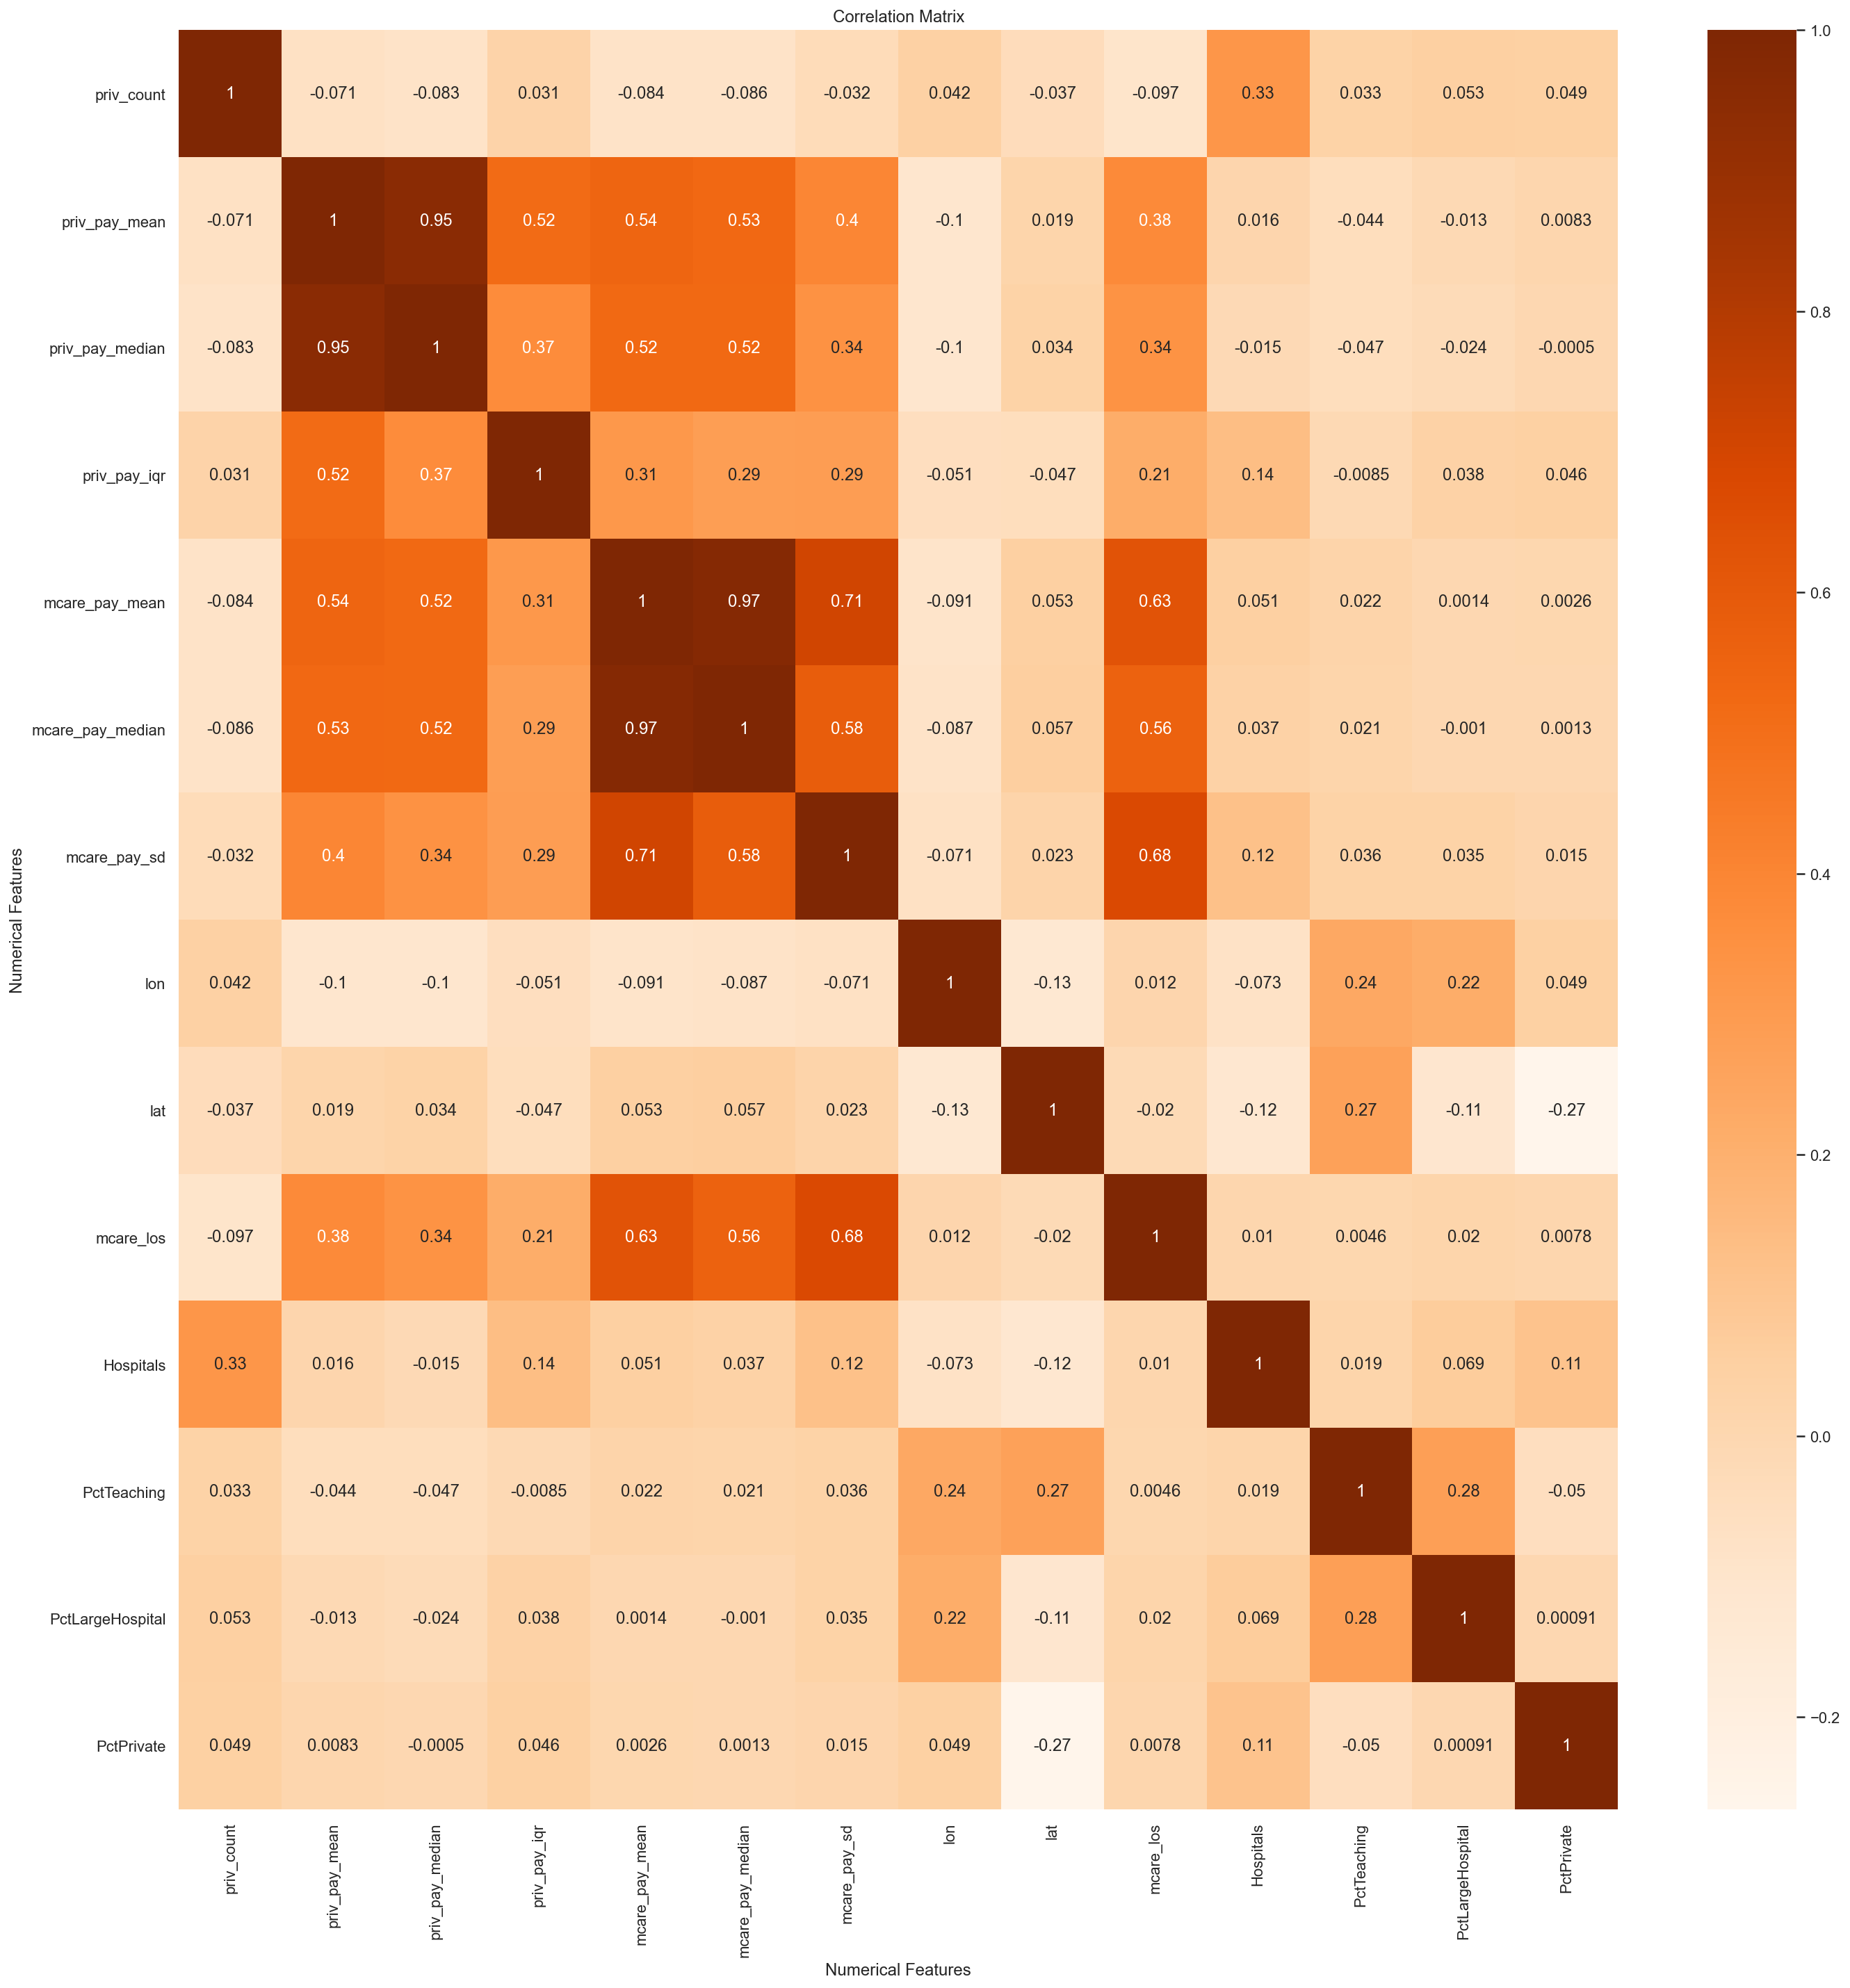

In [11]:
# Plotting correlation matrix

sns.set(rc = {'figure.figsize':(20,20)})
corr_matrix = df[num_features].corr()
sns.heatmap(corr_matrix, cmap="Oranges", annot=True).set(title='Correlation Matrix',
                                         xlabel='Numerical Features',
                                         ylabel='Numerical Features')

plt.tight_layout()

## Missing Values

In [12]:
# Calculating the percentage of missing values for each column

percentages = round(df.isna().sum()*100/df.shape[0], 2)

print('Percentage of Missing Values per column:')
percentages

Percentage of Missing Values per column:


Unnamed: 0           0.00
msa                  0.00
year                 0.00
site                 0.00
group                0.00
priv_count           0.00
priv_pay_mean        0.00
priv_pay_median      0.00
priv_pay_iqr         0.00
mcare_los           19.33
mcare_pay_mean      14.69
mcare_pay_median    14.69
mcare_pay_sd        18.30
CBSA_NAME            0.00
State                0.00
FIPS.State.Code      0.00
lon                  0.30
lat                  0.30
Hospitals            0.43
PctTeaching          0.43
PctLargeHospital     0.43
Urban                0.43
PctPrivate           0.43
dtype: float64

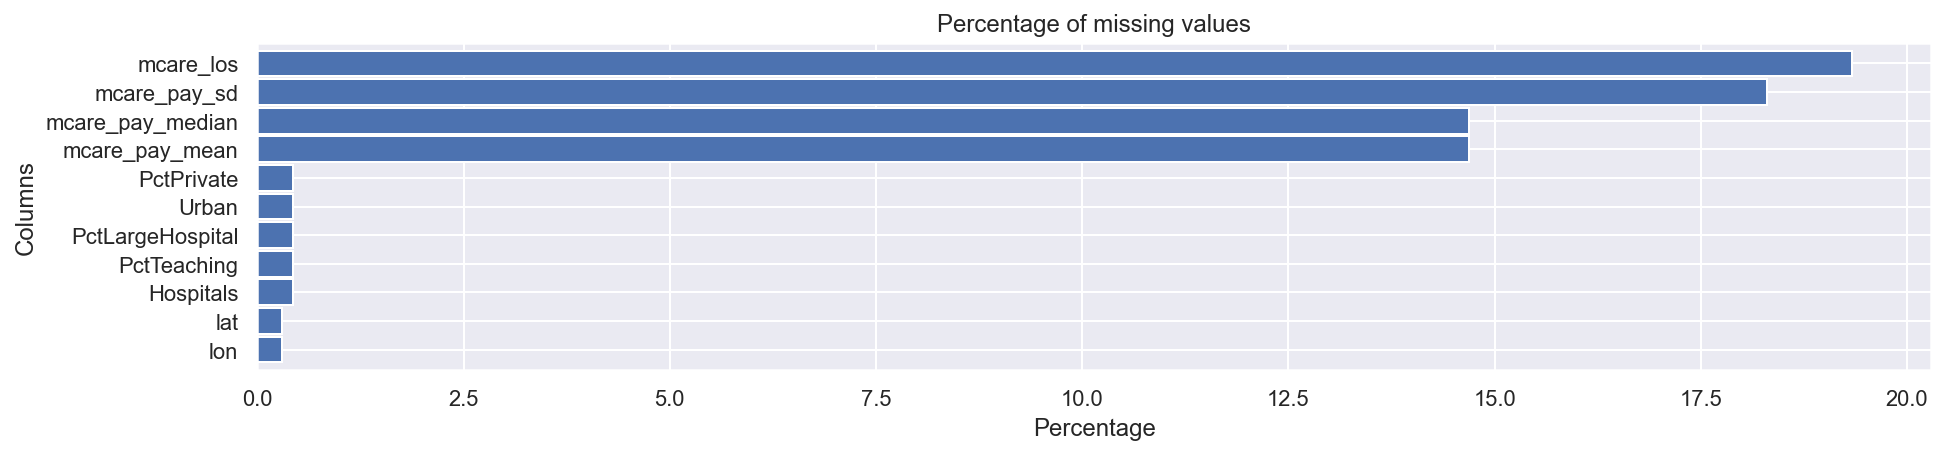

In [13]:
# Plotting the percentage of missing values for each column with missing values

plt.figure(figsize = (15, 3))
percentages[percentages > 0].sort_values().plot.barh(width=0.9)
plt.title('Percentage of missing values')
plt.xlabel('Percentage')
plt.ylabel('Columns')
plt.show();